Nous avons l'ensembles de données d'une entreprise de vetements et nous devons trouver une nouvelle strategie pour améliorer les revenues de l'entreprise.
Nous allons nous lancer dans l'exploration des règles d'association pour trouver de nouveaux plans marketing.



In [3]:
# Creation du dataset
import numpy as np
import pandas as pd

dataset = [
    ['Jupe', 'Baskets', 'Écharpe', 'Pantalon', 'Chapeau'],
    ['Lunettes de soleil', 'Jupe', 'Baskets', 'Pantalon', 'Chapeau'],
    ['Robe', 'Sandales', 'Écharpe', 'Pantalon', 'Talons'],
    ['Robe', 'Collier', "Boucles d'oreilles", 'Écharpe', 'Chapeau', 'Talons', 'Chapeau'],
    ["Boucles d'oreilles", 'Jupe', 'Jupe', 'Écharpe', 'Chemise', 'Pantalon'],

]

dataset

[['Jupe', 'Baskets', 'Écharpe', 'Pantalon', 'Chapeau'],
 ['Lunettes de soleil', 'Jupe', 'Baskets', 'Pantalon', 'Chapeau'],
 ['Robe', 'Sandales', 'Écharpe', 'Pantalon', 'Talons'],
 ['Robe',
  'Collier',
  "Boucles d'oreilles",
  'Écharpe',
  'Chapeau',
  'Talons',
  'Chapeau'],
 ["Boucles d'oreilles", 'Jupe', 'Jupe', 'Écharpe', 'Chemise', 'Pantalon']]

Maintenant que nous avons creer notre dataset nous allons faire une visualisation pour voir la frequence des articles

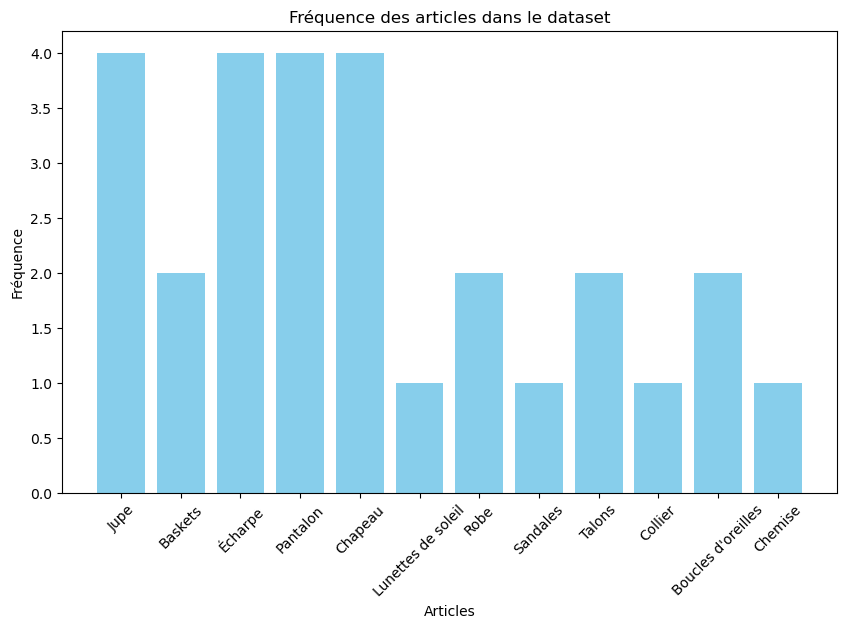

In [4]:
import matplotlib.pyplot as plt

# Compter la fréquence des éléments
item_counts = {}
for transaction in dataset:
    for item in transaction:
        if item in item_counts:
            item_counts[item] += 1
        else:
            item_counts[item] = 1


# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(item_counts.keys(), item_counts.values(), color='skyblue')
plt.xlabel('Articles')
plt.ylabel('Fréquence')
plt.title('Fréquence des articles dans le dataset')
plt.xticks(rotation=45)
plt.show()


Apres observation de la frequences d'achats des différents articles nous allons appliquer l'algorithm d'Apriori à notre dataset.
mais avant l'application de la fonction nous devos transformer notre dataset en un dataframe encodé à chaud. Pour le faire nous allons utiliser la fonction Transaction Encoder et le one-hot  et le mettre sous le format vrai ou faux

In [5]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Baskets,Boucles d'oreilles,Chapeau,Chemise,Collier,Jupe,Lunettes de soleil,Pantalon,Robe,Sandales,Talons,Écharpe
0,True,False,True,False,False,True,False,True,False,False,False,True
1,True,False,True,False,False,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,True,True
3,False,True,True,False,True,False,False,False,True,False,True,True
4,False,True,False,True,False,True,False,True,False,False,False,True


Nous allons sélectionner des ensembles d'éléments avec un minimum de 60 % de support

In [12]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Chapeau)
1,0.6,(Jupe)
2,0.8,(Pantalon)
3,0.8,(Écharpe)
4,0.6,"(Jupe, Pantalon)"
5,0.6,"(Pantalon, Écharpe)"


Code de confiance Si nous voulons extraire des règles basées sur d'autres métriques comme la confiance, nous pouvons utiliser association_rules de la bibliothèque mlxtend.frequent_patterns .

In [11]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Jupe),(Pantalon),0.6,0.8,0.6,1.00,1.2500,0.12,inf,0.50
1,(Pantalon),(Jupe),0.8,0.6,0.6,0.75,1.2500,0.12,1.6,1.00
2,(Pantalon),(Écharpe),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
3,(Écharpe),(Pantalon),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25


Nous allons maintenant utiliser le code d'ascenseur Association basée sur l'ascenseur

In [13]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Jupe),(Pantalon),0.6,0.8,0.6,1.0,1.25,0.12,inf,0.5
